In [3]:
# Show some images of each class.
from constant import *
import os
import numpy as np
#from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
import copy
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import Image, display


imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
with open(imagenet_labels_filename) as f:
    lines = f.readlines()
original_id_to_synset_name = {}
original_id_to_name = {}
for original_id, line in enumerate(lines):
    synset_name = line.split(' ')[0]
    name = line[(len(synset_name) + 1):-1]
    original_id_to_synset_name[original_id] = synset_name
    original_id_to_name[original_id] = name

image_path = imagenet_root + 'ILSVRC2015/Data/CLS-LOC/train/'
for new_id in range(len(synset_names)):
    original_id = new_to_original_class_id[new_id]
    synset_name = original_id_to_synset_name[original_id]
    image_names = os.listdir(image_path + synset_name)
    print new_id, original_id_to_name[original_id], \
        'http://image-net.org/synset?wnid=' + synset_name
    #display(Image(filename=image_path + synset_name + '/' + image_names[0]))
    
    
    

0 goldfish, Carassius auratus http://image-net.org/synset?wnid=n01443537
1 great grey owl, great gray owl, Strix nebulosa http://image-net.org/synset?wnid=n01622779
2 American chameleon, anole, Anolis carolinensis http://image-net.org/synset?wnid=n01682714
3 agama http://image-net.org/synset?wnid=n01687978
4 green snake, grass snake http://image-net.org/synset?wnid=n01729977
5 hummingbird http://image-net.org/synset?wnid=n01833805
6 tusker http://image-net.org/synset?wnid=n01871265
7 koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus http://image-net.org/synset?wnid=n01882714
8 conch http://image-net.org/synset?wnid=n01943899
9 white stork, Ciconia ciconia http://image-net.org/synset?wnid=n02002556
10 crane http://image-net.org/synset?wnid=n02012849
11 oystercatcher, oyster catcher http://image-net.org/synset?wnid=n02037110
12 Chihuahua http://image-net.org/synset?wnid=n02085620
13 Pekinese, Pekingese, Peke http://image-net.org/synset?wnid=n02086079
14 Norfolk terrie

In [2]:
# Show some occluded images for given classes.
from constant import *
import os
import numpy as np
#from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
import copy
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import Image, display

test = 'crop_0'
#class_ids = [94, 48, 81, 1, 0, 22, 65, 29, 41, 95, 28, 82, 68, 7, 43, 98, 93]
class_ids = [41]

imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
with open(imagenet_labels_filename) as f:
    lines = f.readlines()
original_id_to_synset_name = {}
original_id_to_name = {}
for original_id, line in enumerate(lines):
    synset_name = line.split(' ')[0]
    name = line[(len(synset_name) + 1):-1]
    original_id_to_synset_name[original_id] = synset_name
    original_id_to_name[original_id] = name
    
index_file = open('{}dataset/test_{}.txt'.format(imagenet_root, test))
lines = index_file.readlines()
count = {}
for class_id in class_ids:
    count[class_id] = 0
skip = 0

images = {}
for class_id in class_ids:
    images[class_id] = []

for line in lines:
    filename, label = line[0:-1].split(' ')
    label = int(label)
    if skip != 0:
        skip -= 1
        #continue
    if label in class_ids and count[label] != 100:
        images[label].append('{}dataset/{}'.format(imagenet_root, filename))
        count[label] += 1
        skip = 10
    
for label in class_ids:
    for image in images[label]:
        print image
        print label, original_id_to_name[new_to_original_class_id[label]]
        #display(Image(image))


/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_12734_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_5651_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_12547_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_12014_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_1110_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_849_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
/data2/haow3/data/imagenet/dataset/test_crop_0/n02510455_3794_crop_0_0_0.jpeg
41 giant panda, panda, panda bear, coo

crop 100
-----
/data2/haow3/data/imagenet/dataset/test_crop_100/n02510455_12024_crop_0_100_0.jpeg


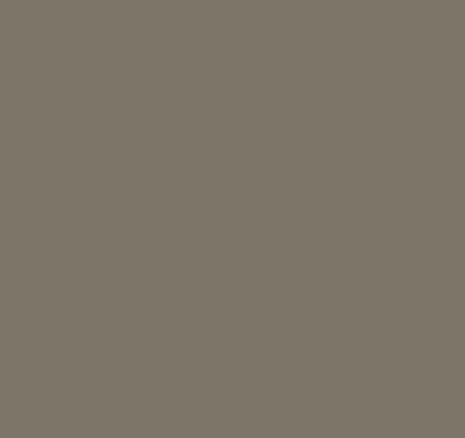

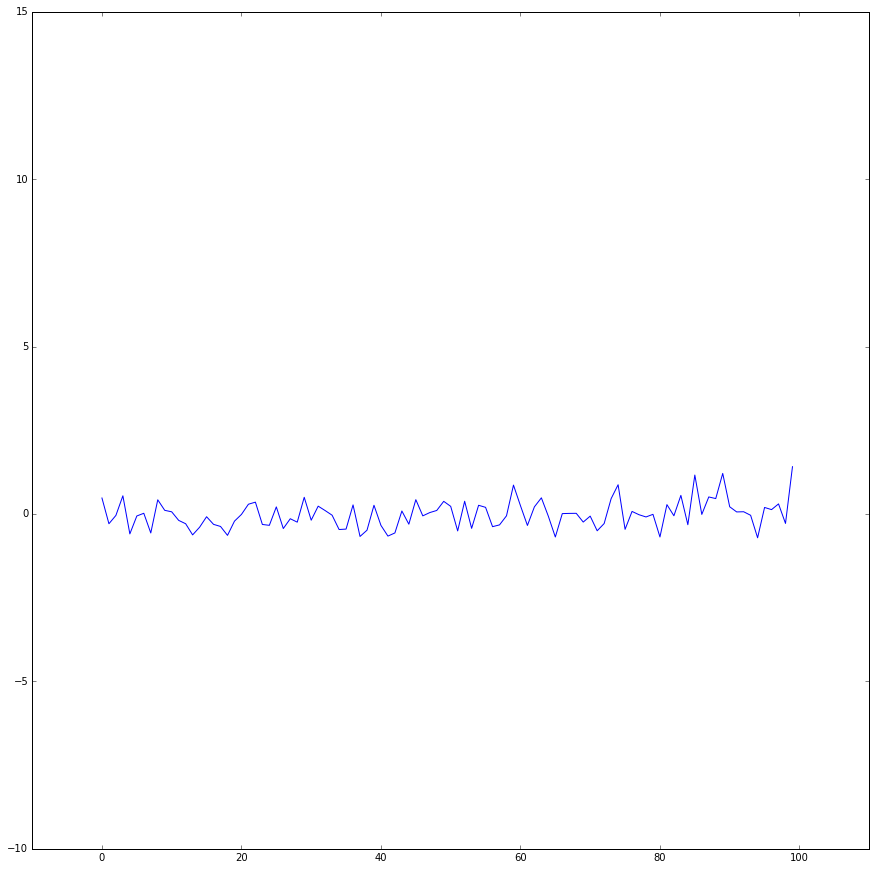

class 99 alp 3.76
class 89 window screen 3.08
class 85 sunscreen, sunblock, sun blocker 2.93
class 74 rule, ruler 2.19
class 59 hook, claw 2.17
hook, claw
rule, ruler
sunscreen, sunblock, sun blocker
window screen
alp
0.0217
0.0219
0.0293
0.0308
0.0376
-----


In [17]:
# Show some occluded images of one image and their top-5 result.
from constant import *
import os
import caffe
from IPython.display import Image, display
import numpy as np

image_names = ['n02510455_12024']
model_type_str = 'crop'
model_name = '0'
test_type_strs = ['crop']
test_names = ['100']

caffe.set_device(3)
caffe.set_mode_gpu()

net = caffe.Net(result_root + 'model/finetune_alexnet_{}_{}/deploy.prototxt'.format(model_type_str, model_name),
                result_root + 'model/finetune_alexnet_{}_{}/finetune_alexnet_{}_{}.caffemodel'.format(model_type_str, model_name, model_type_str, model_name),
                caffe.TEST)

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

net.blobs['data'].reshape(1,3,227,227)

for image_name in image_names:
    for test_type_str in test_type_strs:
        for test_name in test_names:
            print test_type_str, test_name
            for index in range(1 if test_name == '0' or test_name == '100' else 10):
                print '-----'
                filename = '{}dataset/test_{}_{}/{}_{}_0_{}_{}.jpeg'\
                    .format(imagenet_root, test_type_str, test_name, image_name, test_type_str, test_name, index)
                print filename
                display(Image(filename))
                net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(filename))
                net.forward()
                result = [(i, net.blobs['prob'].data[0][i]) for i in range(len(net.blobs['prob'].data[0]))]
                result = sorted(result, key = lambda k: k[1], reverse = True)
                ax = plt.gca()
                ax.set_xlim([-10, 110])
                ax.set_ylim([-10, 15])
                plt.plot(range(100), net.blobs['fc8_occlusion'].data[0])
                plt.show()
                for i in range(5):
                    print 'class', result[i][0], new_id_to_name[result[i][0]], '{:.2f}'.format(result[i][1] * 100)
                for i in reversed(range(5)):
                    print new_id_to_name[result[i][0]]
                for i in reversed(range(5)):
                    print '{:.4f}'.format(result[i][1])
                print '-----'





In [6]:
# Show images in lmdb database.

import caffe
import lmdb
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from constant import *

imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
with open(imagenet_labels_filename) as f:
    lines = f.readlines()
new_id_to_name = {}
for original_id, line in enumerate(lines):
    synset_name = line.split(' ')[0]
    name = line[(len(synset_name) + 1):-1]
    if original_id in original_to_new_class_id:
        new_id_to_name[original_to_new_class_id[original_id]] = name
        
print new_id_to_name



lmdb_env = lmdb.open('/home/haow3/occlusion-project/data/imagenet/lmdb/test_crop_30')
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
datum = caffe.proto.caffe_pb2.Datum()

target_labels = [81, 48, 94, 82, 22]
images = [[] for i in range(100)]

for target_label in target_labels:
    count = 0
    for key, value in lmdb_cursor:
        datum.ParseFromString(value)
        label = datum.label
        if not target_label == label:
            continue
        data = caffe.io.datum_to_array(datum)
        image_data = [[[0 for i in range(3)] for j in range(256)] for k in range(256)]
        for channel in range(len(data)):
            for x in range(len(data[0])):
                for y in range(len(data[0][0])):
                    image_data[x][y][2 - channel] = data[channel][x][y]
        images[target_label].append(copy.copy(image_data))
        count += 1
        if count == 10:
            break


plt.rcParams['figure.figsize'] = (15, 6)
for target_label in target_labels:
    fig = plt.figure()
    fig.suptitle('Sampled Images of Class {}: {}'.format(target_label, new_id_to_name[target_label]), fontsize = 18)
    for i, image_data in enumerate(images[target_label]):
        ax = plt.subplot(2, 5, i + 1)
        ax.imshow(image_data)
    plt.show()
    plt.close()

{0: 'goldfish, Carassius auratus', 1: 'great grey owl, great gray owl, Strix nebulosa', 2: 'American chameleon, anole, Anolis carolinensis', 3: 'agama', 4: 'green snake, grass snake', 5: 'hummingbird', 6: 'tusker', 7: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus', 8: 'conch', 9: 'white stork, Ciconia ciconia', 10: 'crane', 11: 'oystercatcher, oyster catcher', 12: 'Chihuahua', 13: 'Pekinese, Pekingese, Peke', 14: 'Norfolk terrier', 15: 'Norwich terrier', 16: 'golden retriever', 17: 'German shepherd, German shepherd dog, German police dog, alsatian', 18: 'boxer', 19: 'Eskimo dog, husky', 20: 'Pomeranian', 21: 'hyena, hyaena', 22: 'Arctic fox, white fox, Alopex lagopus', 23: 'Siamese cat, Siamese', 24: 'tiger, Panthera tigris', 25: 'mongoose', 26: 'ground beetle, carabid beetle', 27: 'long-horned beetle, longicorn, longicorn beetle', 28: 'cabbage butterfly', 29: 'sea cucumber, holothurian', 30: 'porcupine, hedgehog', 31: 'Arabian camel, dromedary, Camelus dromeda

KeyboardInterrupt: 

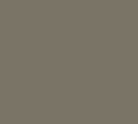

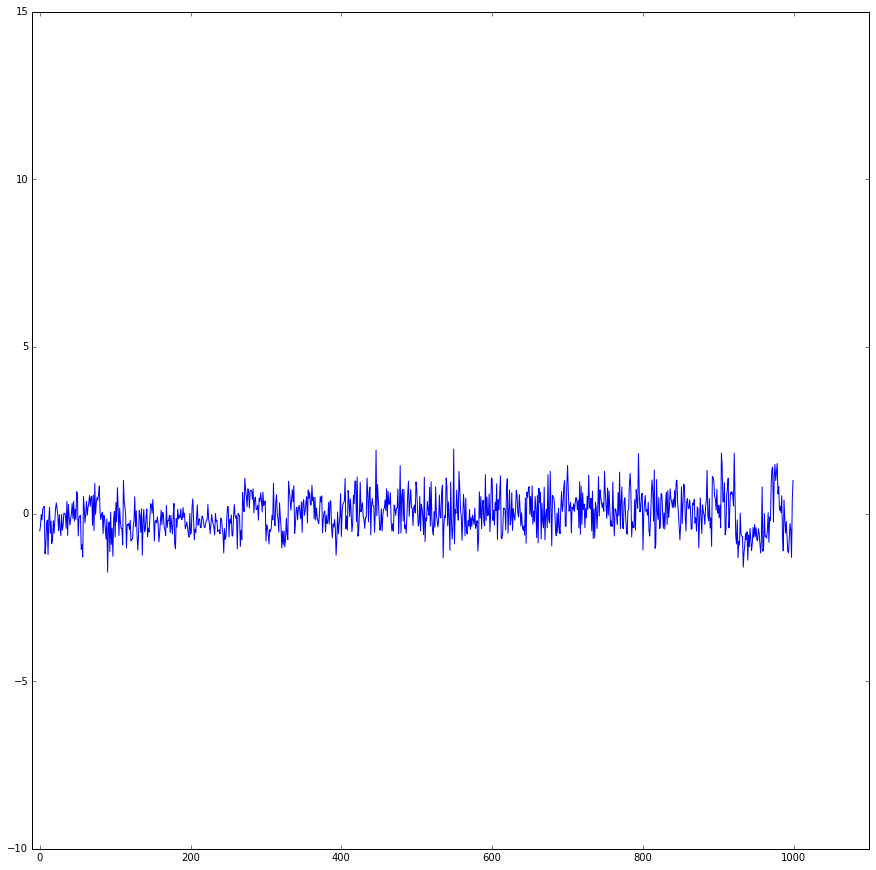

In [13]:
# Network + Image -> Vector

# Show some occluded images of one image and their top-5 result.
from constant import *
import os
import caffe
from IPython.display import Image, display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 15)

caffe.set_device(3)
caffe.set_mode_gpu()

model_name = 'finetune_alexnet_prototype_0'
image_path = '/home/haow3/occlusion-project/data/misc/gray.jpg'

net = caffe.Net(result_root + 'model/{}/deploy.prototxt'.format(model_name),
                result_root + 'model/{}/{}.caffemodel'.format(model_name, model_name),
                caffe.TEST)

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

net.blobs['data'].reshape(1,3,227,227)


display(Image(image_path))
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(image_path))
net.forward()
result = [(i, net.blobs['prob'].data[0][i]) for i in range(len(net.blobs['prob'].data[0]))]
result = sorted(result, key = lambda k: k[1], reverse = True)

ax = plt.gca()
ax.set_xlim([-10, 1100])
ax.set_ylim([-10, 15])
plt.plot(range(1000), net.blobs['fc8'].data[0])
plt.show()



